### <font color = brown>**BIG DATA AND DATA MINING**</font> 

#### Importing useful libraries...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 300)

# Import relevant models
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import plot_importance

In [2]:
# Take a quick look at the imported data
df_accident = pd.read_csv('Road Safety Data - Accidents 2019.csv', low_memory=False)
print(df_accident.shape)
df_accident.head()

(117536, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,3,01:20,2,E09000007,4,510,6,20,3,4,4,510,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,3,00:40,28,E09000005,3,4003,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1,E01000546


In [3]:
# Checking for missing data in the accident dataset
df_accident.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [4]:
# Take a quick look at the imported data
df_vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv', low_memory=False)
print(df_vehicles.shape)
df_vehicles.head()

(216381, 23)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4


In [5]:
# Checking for missing data in the vehicles dataset
df_vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [6]:
# Take a quick look at the imported data
df_casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv', low_memory=False)
print(df_casualties.shape)
df_casualties.head()

(153158, 16)


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [7]:
# Checking for missing data in the casualty dataset
df_casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

## Performing EDA and then Cleaning

In [8]:
# Gives a quick discription of dataset at a glance
df_accident.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000
mean,452403.224717,2.786857e+05,-1.249439,52.395427,28.228160,2.772512,1.840976,1.303073,4.111149,326.686522,4.192052,864.461365,5.213364,36.773414,2.299704,1.532245,2.618134,306.326121,-0.005717,0.862340,2.046888,1.653102,1.291945,0.074939,0.044318,1.323569,1.392807
std,95033.024831,1.509356e+05,1.392356,1.359522,24.622519,0.451610,0.708412,0.754369,1.920117,256.494631,1.462743,2223.470576,1.676701,14.066137,2.684351,2.352310,3.210643,1160.683698,0.277764,1.996284,1.731131,1.809202,0.598592,0.663085,0.528075,0.468349,0.638504
min,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,388018.250000,1.755260e+05,-2.180604,51.465934,5.000000,3.000000,1.000000,1.000000,2.000000,84.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,459396.000000,2.184650e+05,-1.123331,51.852523,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,4.000000,45.000000,6.000000,30.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,529373.250000,3.848040e+05,-0.135499,53.357497,45.000000,3.000000,2.000000,1.000000,6.000000,514.000000,6.000000,603.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655244.000000,1.167366e+06,1.757476,60.388637,98.000000,3.000000,17.000000,52.000000,7.000000,941.000000,6.000000,498878.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [9]:
df_accident.describe(include=['object'])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,117536,117536,117473,117536,111822
unique,117536,365,1439,207,27762
top,2019010128300,04/12/2019,17:00,E10000016,E01032739
freq,1,495,1139,3619,194


column_name                missing_count
LSOA_of_Accident_Location  5714             1
Latitude                   28               1
Location_Easting_OSGR      28               1
Location_Northing_OSGR     28               1
Longitude                  28               1
Time                       63               1
dtype: int64


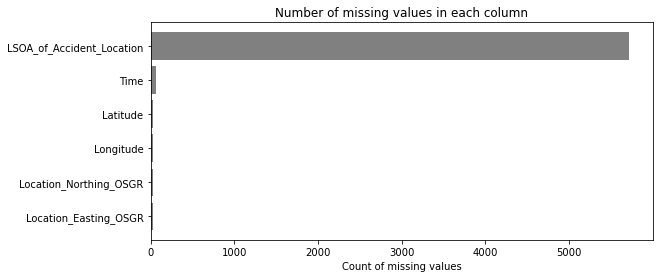

In [10]:
# Lets visualize columns with missing values and how much of it is missing 
missing_df = df_accident.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df.value_counts())

fig,ax = plt.subplots(figsize=(9,4))
ind = np.arange(missing_df.shape[0])
width = 0.5
rects = ax.barh(ind,missing_df.missing_count.values,color='grey')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.ticklabel_format(useOffset=False, style='plain', axis='x')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show();

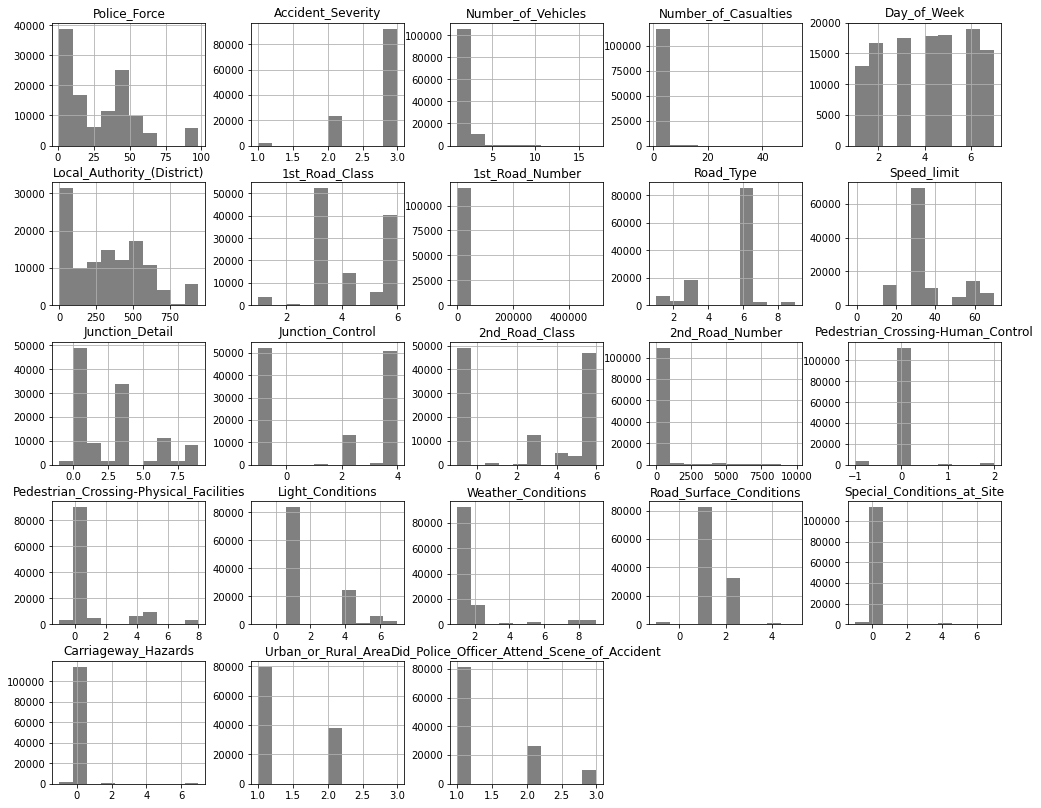

In [11]:
df_accident.select_dtypes('int').hist(figsize=(17,14), color="grey");

From these plots we can see Accident Severity column is right skewed with majority of the accident being fatal, the Number of Vehicles involved in accidents is between 2 to 4, the Number of Casualties is also usually few. Accident happens any other day of the week as this is varies alot e.t.c  







1     1658
2    23422
3    92456
Name: Accident_Severity, dtype: int64


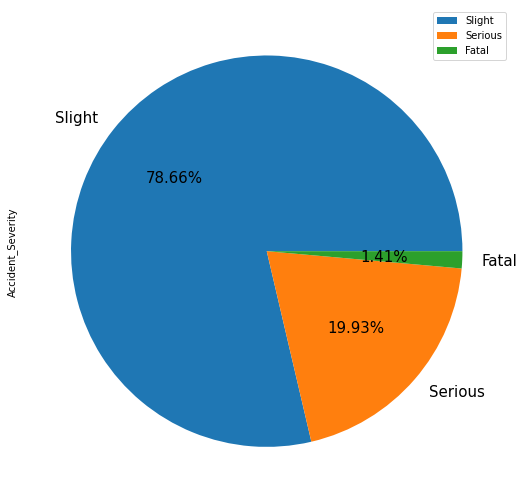

In [12]:
print(df_accident['Accident_Severity'].value_counts().sort_index())

# Change values to listed meanings
df_accident.Accident_Severity = df_accident.Accident_Severity.replace([1,2,3], ['Fatal', 'Serious', 'Slight'])

df_accident['Accident_Severity'].value_counts().plot.pie(figsize=(9,9),autopct='%1.2f%%',
                                                         shadow=False, fontsize=15, legend='auto' );

In [13]:
# First we look at the time column with missing values
df_accident[df_accident['Time'].isna()].head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
578,2019010157254,533599.0,193819.0,-0.071257,51.627336,1,Slight,2,1,13/01/2019,1,NaN,32,E09000010,4,154,6,20,-1,-1,6,0,0,0,7,1,2,0,0,1,3,E01001461
582,2019010157270,534633.0,181247.0,-0.061140,51.514114,1,Slight,2,1,10/01/2019,5,NaN,5,E09000030,6,0,6,20,6,2,6,0,-1,1,1,8,1,0,0,1,3,E01004304
2326,2019010162544,529616.0,180782.0,-0.133571,51.511108,1,Slight,1,1,10/02/2019,1,NaN,1,E09000033,3,401,6,20,3,2,6,0,0,0,4,5,2,0,0,1,1,E01004763
2417,2019010162834,528247.0,174040.0,-0.155733,51.450830,1,Slight,2,1,10/02/2019,1,NaN,10,E09000032,4,237,9,20,-1,-1,6,0,-1,-1,4,5,2,-1,-1,1,3,E01004479
2570,2019010163302,526839.0,182474.0,-0.172958,51.526944,1,Slight,2,1,14/02/2019,5,NaN,1,E09000033,4,507,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004725


In [14]:
# Checking for the most occuring accident time i.e mode
df_accident['Time'].value_counts().head()

17:00    1139
17:30    1035
16:00     997
16:30     992
18:00     986
Name: Time, dtype: int64

In [15]:
# Missing time values is now filled with the mode
df_accident['Time'].fillna("17:00", inplace=True)

In [16]:
# look at the Longitude column with missing values
df_accident[df_accident['Longitude'].isna()].head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,NaN,NaN,4,Slight,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN
29369,2019051910615,NaN,NaN,NaN,NaN,5,Slight,1,1,04/03/2019,2,17:50,95,E08000015,6,0,6,30,3,4,6,0,0,0,4,5,2,0,0,3,1,NaN
30791,2019051912864,NaN,NaN,NaN,NaN,5,Serious,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1,NaN
34816,2019070003662,NaN,NaN,NaN,NaN,7,Slight,1,1,04/01/2019,6,15:56,130,E06000050,3,5268,6,30,9,2,6,0,0,0,1,9,1,0,0,3,1,NaN
35505,2019070275916,NaN,NaN,NaN,NaN,7,Slight,2,1,28/05/2019,3,18:00,128,E06000007,3,574,1,30,1,4,3,574,0,0,1,1,1,0,0,3,2,NaN


In [17]:
# look at the time Latitude column with missing values
df_accident[df_accident['Latitude'].isna()].head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,NaN,NaN,4,Slight,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN
29369,2019051910615,NaN,NaN,NaN,NaN,5,Slight,1,1,04/03/2019,2,17:50,95,E08000015,6,0,6,30,3,4,6,0,0,0,4,5,2,0,0,3,1,NaN
30791,2019051912864,NaN,NaN,NaN,NaN,5,Serious,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1,NaN
34816,2019070003662,NaN,NaN,NaN,NaN,7,Slight,1,1,04/01/2019,6,15:56,130,E06000050,3,5268,6,30,9,2,6,0,0,0,1,9,1,0,0,3,1,NaN
35505,2019070275916,NaN,NaN,NaN,NaN,7,Slight,2,1,28/05/2019,3,18:00,128,E06000007,3,574,1,30,1,4,3,574,0,0,1,1,1,0,0,3,2,NaN


In [18]:
# Missing points in Latitude Longitudeis filled forward since just 28 was missing
df_accident['Longitude'].fillna(method='ffill', inplace=True)
df_accident['Latitude'].fillna(method='ffill', inplace=True)

In [19]:
# The 'Location_Northing_OSGR', 'Location_Easting_OSGR' and 'LSOA_of_Accident_Location' is dropped 
selected =    ['Accident_Index', 
               #'Location_Easting_OSGR', 
               #'Location_Northing_OSGR',
               'Longitude', 
               'Latitude', 
               'Police_Force', 
               'Accident_Severity',
               'Number_of_Vehicles', 
               'Number_of_Casualties', 
               'Date', 'Day_of_Week',
               'Time', 
               'Local_Authority_(District)', 
               'Local_Authority_(Highway)',
               '1st_Road_Class', 
               '1st_Road_Number', 
               'Road_Type', 
               'Speed_limit',
               'Junction_Detail', 
               'Junction_Control', 
               '2nd_Road_Class',
               '2nd_Road_Number', 
               'Pedestrian_Crossing-Human_Control',
               'Pedestrian_Crossing-Physical_Facilities', 
               'Light_Conditions',
               'Weather_Conditions', 
               'Road_Surface_Conditions',
               'Special_Conditions_at_Site', 
               'Carriageway_Hazards',
               'Urban_or_Rural_Area', 
               'Did_Police_Officer_Attend_Scene_of_Accident'
               #'LSOA_of_Accident_Location'
            ] 
 
# Lets take a look to see if these columns have been dropped    
df_accident = df_accident[selected]
display(df_accident.head())   

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,2019010128300,-0.153842,51.508057,1,Slight,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3
1,2019010152270,-0.127949,51.436208,1,Slight,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3
2,2019010155191,-0.124193,51.526795,1,Slight,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1
3,2019010155192,-0.191044,51.546387,1,Serious,1,1,01/01/2019,3,01:20,2,E09000007,4,510,6,20,3,4,4,510,0,0,4,1,1,0,0,1,1
4,2019010155194,-0.200064,51.541121,1,Slight,2,2,01/01/2019,3,00:40,28,E09000005,3,4003,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1


In [20]:
# Check to see if all missing data in the accident dataset have been taking care of
df_accident.isnull().sum()

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

## <font color = red>**_Question (A)_**</font>: Are there significant hours of the day, and days of the week, on which accidents occur?

Day of the Week codes include:

|code|label|
|-----|-----|
|<font color = orange>1   |Sunday|
|<font color = orange>2   |Monday|
|<font color = orange>3   |Tuesday|
|<font color = orange>4   |Wednesday|
|<font color = orange>5  |Thursday|
|<font color = orange>6  |Friday|
|<font color = orange>7  |Saturday|

Friday       19056
Thursday     17973
Wednesday    17775
Tuesday      17598
Monday       16643
Saturday     15556
Sunday       12935
Name: Day_of_Week, dtype: int64


<AxesSubplot:title={'center':'Days of week with the most accidents'}>

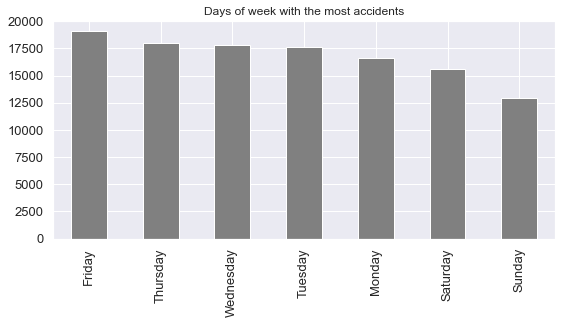

In [21]:
df_accident['Day_of_Week'] = df_accident['Day_of_Week'].replace({1:"Sunday",
                                                                 2:"Monday",
                                                                 3:"Tuesday",
                                                                 4:"Wednesday",
                                                                 5:"Thursday",
                                                                 6:"Friday",
                                                                 7:"Saturday",})

plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
print(df_accident['Day_of_Week'].value_counts())
df_accident['Day_of_Week'].value_counts().plot(kind="bar",
                                               fontsize=13,
                                               color = "grey",
                                               title = "Days of week with the most accidents")


17:00    1202
17:30    1035
16:00     997
16:30     992
18:00     986
Name: Time, dtype: int64


<AxesSubplot:title={'center':'Hour of the day with the most accidents'}>

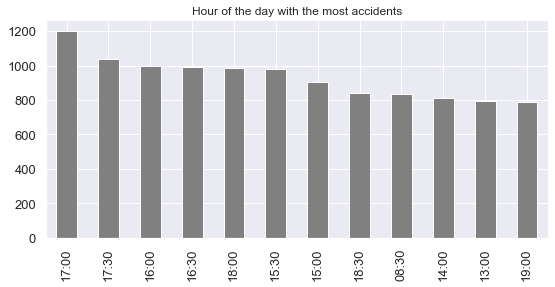

In [22]:
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
accident_time = df_accident['Time'].value_counts().head(12)
print(accident_time.head())
accident_time.plot(kind="bar", 
                   color = "grey",
                   fontsize=13,
                   title = "Hour of the day with the most accidents")

## <font color = red>**_Question (B)_**</font>:  For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?


Motocycle codes include:

|code|label|
|-----|-----|
|<font color = orange>2   |Motorcycle 50cc and under|
|<font color = orange>3   |Motorcycle 125cc and under|
|<font color = orange>4   |Motorcycle over 125cc and up to 500cc|
|<font color = orange>5   |Motorcycle over 500cc|
|<font color = orange>23  |Electric motorcycle|
|<font color = orange>97  |Motorcycle - unknown cc|

Friday       2775
Wednesday    2552
Thursday     2549
Tuesday      2483
Monday       2232
Saturday     2227
Sunday       2098
Name: Day_of_Week, dtype: int64


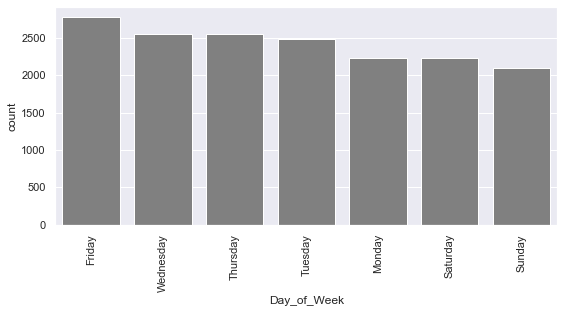

In [23]:
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
# Choosing the different motorcycle types
motorbikes = df_vehicles["Accident_Index"][df_vehicles["Vehicle_Type"].isin([2,3,4,5,23,97])] 
motorbikes_accidents = df_accident[df_accident["Accident_Index"].isin(motorbikes.tolist())]
sns.countplot(data = motorbikes_accidents, 
              color = "grey", 
              x = 'Day_of_Week', 
              order = motorbikes_accidents["Day_of_Week"].value_counts().index)
print(motorbikes_accidents['Day_of_Week'].value_counts())
plt.xticks(rotation = 90)
plt.show()

17    1672
16    1476
18    1410
15    1253
13    1061
Name: Hour, dtype: int64


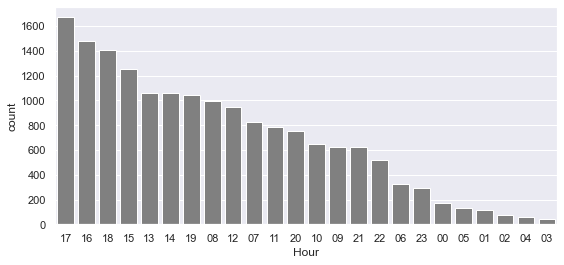

In [24]:
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
# split time using full column to get the hours
Time = motorbikes_accidents.loc[:, ('Time')].str.split(':', expand=True) 

# rename columns to hour and minutes
Time.rename(columns = {0: 'Hour', 1: 'Mins'}, inplace = True) 
sns.countplot(x='Hour', 
              data = Time, 
              color = "grey", 
              order = Time.Hour.value_counts().index)
print(Time.Hour.value_counts().head())
plt.xticks(rotation = 0)
plt.show()

In [25]:
# Combine accident and vehicle dataframes together.
df_accident_vehicles = pd.concat([df_accident, df_vehicles], axis=1)
df_accident_vehicles.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,-0.153842,51.508057,1.0,Slight,2.0,3.0,18/02/2019,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010152270,-0.127949,51.436208,1.0,Slight,2.0,1.0,15/01/2019,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010155191,-0.124193,51.526795,1.0,Slight,2.0,1.0,01/01/2019,Tuesday,01:50,2.0,E09000007,4.0,504.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,2019010155192,-0.191044,51.546387,1.0,Serious,1.0,1.0,01/01/2019,Tuesday,01:20,2.0,E09000007,4.0,510.0,6.0,20.0,3.0,4.0,4.0,510.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155194,-0.200064,51.541121,1.0,Slight,2.0,2.0,01/01/2019,Tuesday,00:40,28.0,E09000005,3.0,4003.0,6.0,30.0,6.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4


In [26]:
def motorbikes_status(Vehicle_Type):
    motorbike_type = []
    for i in Vehicle_Type:
        if i == 2:
            motorbike_type.append("Motorcycle 50cc and under")
        elif i == 3:
            motorbike_type.append("Motorcycle 125cc and under")
        elif i == 4:
            motorbike_type.append("Motorcycle over 125cc and up to 500cc")
        elif i == 5:
            motorbike_type.append("Motorcycle over 500cc")
        elif i == 23:
            motorbike_type.append("Electric motorcycle")
        elif i == 97:
            motorbike_type.append("Motorcycle - unknown cc")
        else:
            motorbike_type.append("Not Motorcycle")
    return motorbike_type

In [27]:
df_accident_vehicles['motorbike_type'] = motorbikes_status(df_vehicles['Vehicle_Type'])
df_accident_vehicles['motorbike_type'].value_counts()

Not Motorcycle                           199012
Motorcycle 125cc and under                 8053
Motorcycle over 500cc                      5228
Motorcycle over 125cc and up to 500cc      2119
Motorcycle 50cc and under                  1489
Motorcycle - unknown cc                     415
Electric motorcycle                          65
Name: motorbike_type, dtype: int64

## <font color = red>**_Question (c)_**</font>: For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

Casualty Class codes include:

|code|label|
|-----|-----|
|<font color = orange>1   |Driver or rider|
|<font color = orange>2   |Passenger|
|<font color = orange>3   |Pedestrian|


Friday       3539
Thursday     3320
Wednesday    3265
Tuesday      3201
Monday       3023
Saturday     2707
Sunday       1851
Name: Day_of_Week, dtype: int64


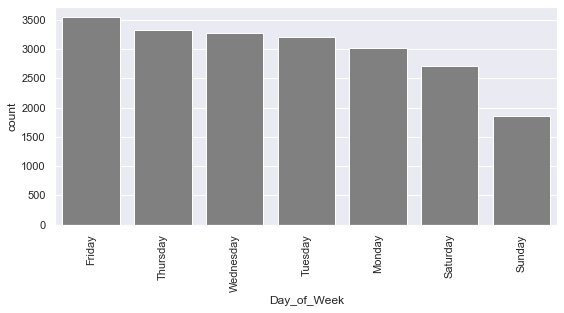

15    2287
17    1821
16    1812
08    1698
18    1531
13    1202
14    1177
Name: Hour, dtype: int64


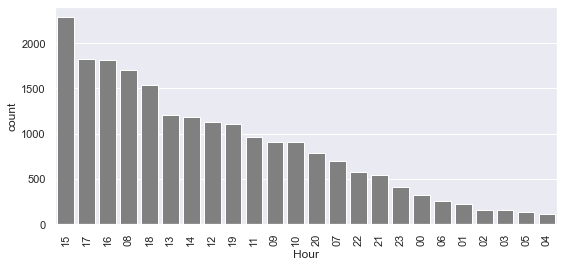

In [28]:
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
# Choosing pedestrians from the casualty class
pedestrians = df_casualties["Accident_Index"][df_casualties["Casualty_Class"].isin([3])] 
pedestrians_accidents = df_accident[df_accident["Accident_Index"].isin(pedestrians.tolist())]
sns.countplot(data = pedestrians_accidents, 
              color = "grey", 
              x = 'Day_of_Week', 
             order = pedestrians_accidents.Day_of_Week.value_counts().index)
print(pedestrians_accidents['Day_of_Week'].value_counts())
plt.xticks(rotation =90)
plt.show()



plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
# split time using full column to get the hours
Time = pedestrians_accidents.loc[:, ('Time')].str.split(':', expand=True) 
# rename columns to hour and minutes
Time.rename(columns = {0: 'Hour', 1: 'Mins'}, inplace = True) 
sns.countplot(data = Time, 
              color = "grey", 
              x = 'Hour', 
              order = Time.Hour.value_counts().index)
print(Time.Hour.value_counts().head(7))
plt.xticks(rotation = 90)
plt.show()

## <font color = red>**_Question (D)_**</font>: What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

In order to find out whether there was an impact of daylight savings on road traffic accidents, we would compare the week before daylight savings started to the week it actually started, and also we would compare the week it actually stopped to the week after it stopped.

- The week before it started is: 24 March - 30 March.
- The week it started is: 31 March - 06 April.
- The week it ended is: 20 October - 26 October.
- The week after it ended is: 27 October - 02 November.
[Source](https://www.timeanddate.com/sun/@9055996?month=3&year=2019)

The Impact of **daylight savings (DLS)** will be investigated using
1. Percentages of accidents
2. Percentages of casualties


In [29]:
# Python's to datetime function is easily used to select specific time
df_accident["Date"] = df_accident["Date"].apply(pd.to_datetime) 

week_before_DLS_started = df_accident[df_accident["Date"].between('2019-03-24', '2019-03-30')]
week_DLS_started = df_accident[df_accident["Date"].between('2019-03-31', '2019-04-06')]
week_DLS_ended = df_accident[df_accident["Date"].between('2019-10-20', '2019-10-26')]
week_after_DLS_ended = df_accident[df_accident["Date"].between('2019-10-27', '2019-11-02')]

total_accident_duration = df_accident[df_accident["Date"].between('2019-01-01', '2019-12-31')]

In [30]:
no_of_acc_before_DlS_started = week_before_DLS_started.shape[0]
no_of_acc_DLS_started  = week_DLS_started.shape[0]
no_of_acc_DLS_ended = week_DLS_ended.shape[0]
no_of_acc_after_DlS_ended = week_after_DLS_ended.shape[0]
no_of_acc_for_the_entire_period = total_accident_duration.shape[0]



print('Number of accident before the week DLS started: {}'.format(no_of_acc_before_DlS_started))
print('Number of accident the week DLS started: {}'.format(no_of_acc_DLS_started))
print('Number of accident the week DLS ended: {}'.format(no_of_acc_DLS_ended))
print('Number of accident after the week DLS ended: {}'.format(no_of_acc_after_DlS_ended))

print('Number of accident for the entire duration: {}'.format(no_of_acc_for_the_entire_period))



Number of accident before the week DLS started: 2331
Number of accident the week DLS started: 2111
Number of accident the week DLS ended: 2158
Number of accident after the week DLS ended: 2234
Number of accident for the entire duration: 117536


**Percentage of accidents**

In [31]:
percent_change_in_start_week = (no_of_acc_before_DlS_started - no_of_acc_DLS_started)/no_of_acc_for_the_entire_period
percent_change_in_end_week = (no_of_acc_after_DlS_ended - no_of_acc_DLS_ended)/no_of_acc_for_the_entire_period

print('Precentage change in accident before daylight savings started: {:.2f}'. 
      format(percent_change_in_start_week*100) + '%')
print('Precentage change in accident after daylight savings ended: {:.2f}'. 
      format(percent_change_in_end_week*100) + '%')

Precentage change in accident before daylight savings started: 0.19%
Precentage change in accident after daylight savings ended: 0.06%


**Barchart of road traffic accidents in the week after daylight savings starts and stops**

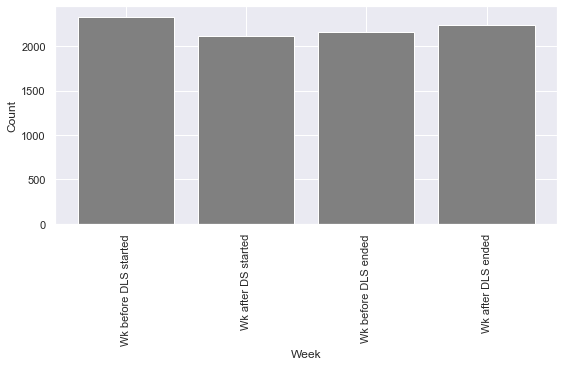

In [32]:
acc=[
    no_of_acc_before_DlS_started,
    no_of_acc_DLS_started,
    no_of_acc_DLS_ended,
    no_of_acc_after_DlS_ended]
ticks = [
    'Wk before DLS started',
    'Wk after DS started',
    'Wk before DLS ended',
    'Wk after DLS ended']

plt.figure(figsize=(9,4))
plt.bar(ticks, acc, color = "grey")
plt.xticks(rotation = 90)
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

In [33]:
no_of_cas_before_DlS_started = week_before_DLS_started.Number_of_Casualties.sum(axis = 0)
no_of_cas_DLS_started  = week_DLS_started.Number_of_Casualties.sum(axis = 0)
no_of_cas_DLS_ended = week_DLS_ended.Number_of_Casualties.sum(axis = 0)
no_of_cas_after_DlS_ended = week_after_DLS_ended.Number_of_Casualties.sum(axis = 0)
no_of_cas_for_the_entire_period = total_accident_duration.Number_of_Casualties.sum(axis = 0)

print('Number of accident before the week DLS started: {}'.format(no_of_cas_before_DlS_started))
print('Number of casualties the week DLS started: {}'.format(no_of_cas_DLS_started))
print('Number of casualties the week DLS ended: {}'.format(no_of_cas_DLS_ended))
print('Number of casualties after the week DLS ended: {}'.format(no_of_cas_after_DlS_ended))

print('Number of casualties for the entire duration: {}'.format(no_of_cas_for_the_entire_period))

Number of accident before the week DLS started: 2973
Number of casualties the week DLS started: 2717
Number of casualties the week DLS ended: 2824
Number of casualties after the week DLS ended: 2900
Number of casualties for the entire duration: 153158


**Percentage of casualties**

In [34]:
percent_change_in_start_week = (no_of_cas_before_DlS_started - no_of_cas_DLS_started)/no_of_cas_for_the_entire_period
percent_change_in_end_week = (no_of_cas_after_DlS_ended - no_of_cas_DLS_ended)/no_of_cas_for_the_entire_period

print('Precentage change in casualties before daylight savings started: {:.2f}'. 
      format(percent_change_in_start_week*100) + '%')
print('Precentage change in casualties after daylight savings ended: {:.2f}'. 
      format(percent_change_in_end_week*100) + '%')

Precentage change in casualties before daylight savings started: 0.17%
Precentage change in casualties after daylight savings ended: 0.05%


**Barchart of road traffic accident casualties in the week after daylight savings starts and stops**

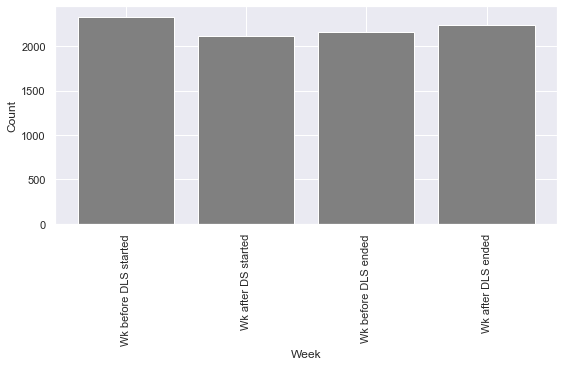

In [35]:
cas=[
    no_of_cas_before_DlS_started,
    no_of_cas_DLS_started,
    no_of_cas_DLS_ended,
    no_of_cas_after_DlS_ended]
ticks = [
    'Wk before DLS started',
    'Wk after DS started',
    'Wk before DLS ended',
    'Wk after DLS ended']

plt.figure(figsize=(9,4))
plt.bar(ticks, acc, color = "grey")
plt.xticks(rotation = 90)
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

## <font color = red>**_Question (E)_**</font>: What impact, if any, does sunrise and sunset times have on road traffic accidents?

Sunrise and sunset varies throughout the year, Hence our analysis will be divided into seasons. The UK has four seasons: spring, summer, autumn, and winter. The table shows the duration of time sunrise and sunset was experienced in the UK in 2019. [Source](https://www.timeanddate.com/sun/@9055996?month=3&year=2019)


|Seasons | Months | Sunrise Time | Sunset Time|
|-------|--------|---------|--------|
|Spring| March, April, and May| 6 am | 8 pm|
|Summer| June, July, and August| 4 am | 9 pm|
|Autumn| September, October, and November | 7 am| 5 pm|
|Winter| December, January, and February | 8 am | 4 pm|


In [36]:
# Split time into hours and mintes using :, with the hours only extracted
hrs = df_accident.Time.str.split(':', expand = True)[0] 
# A new variable "Hour" is created and added to the accident dataframe
df_accident.loc[:,'Hour'] = hrs 

acc = df_accident.copy()
acc.Hour = acc.Hour.astype(int)  
acc = acc.sort_values(by = ['Hour'])

spring = acc[acc.Date.dt.month.isin([3, 4, 5])]
summer = acc[acc.Date.dt.month.isin([6, 7, 8])]
autumn = acc[acc.Date.dt.month.isin([9, 10, 11])]
winter = acc[acc.Date.dt.month.isin([12, 1, 2])]

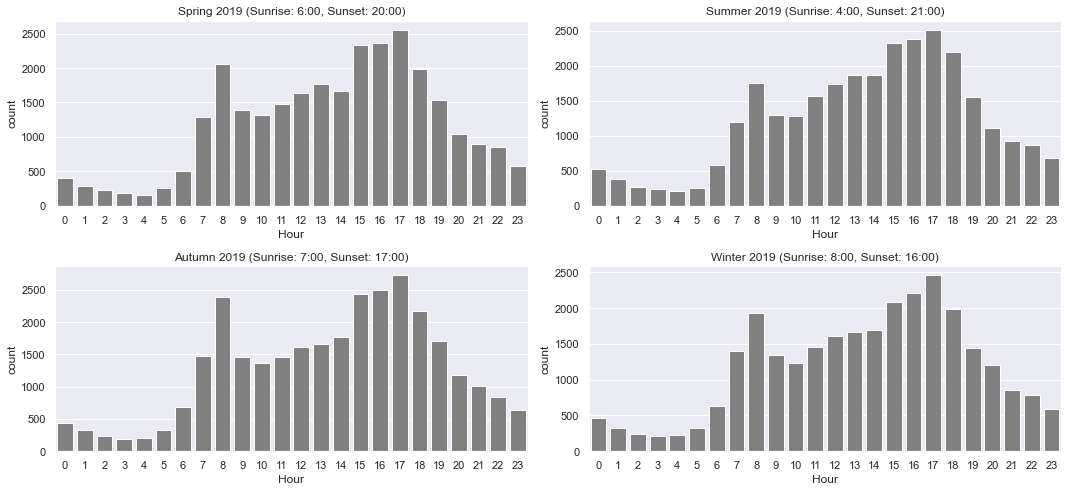

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(221)
sns.countplot(x = 'Hour', data = spring, color = "grey")
plt.title('Spring 2019 (Sunrise: 6:00, Sunset: 20:00)')

plt.subplot(222)
sns.countplot(x = 'Hour', data = summer, color = "grey")
plt.title('Summer 2019 (Sunrise: 4:00, Sunset: 21:00)')

plt.subplot(223)
sns.countplot(x = 'Hour', data = autumn, color = "grey")
plt.title('Autumn 2019 (Sunrise: 7:00, Sunset: 17:00)')

plt.subplot(224)
sns.countplot(x = 'Hour', data = winter, color = "grey")
plt.title('Winter 2019 (Sunrise: 8:00, Sunset: 16:00)')

plt.tight_layout()
plt.show()

## <font color = red>**_Question (F)_**</font>: Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

***Vehicle codes include:***

|code|label|
|-----|-----|
|<font color = orange>1   |Pedal cycle|
|<font color = orange>2   |Motorcycle 50cc and under|
|<font color = orange>3   |Motorcycle 125cc and under|
|<font color = orange>4   |Motorcycle over 125cc and up to 500cc|
|<font color = orange>5   |Motorcycle over 500cc|
|<font color = orange>8   |Taxi/Private hire car|
|<font color = orange>9   |Car|
|<font color = orange>11  |Bus or coach (17 or more pass seats)|
|<font color = orange>19  |Van / Goods 3.5 tonnes mgw or under|
|<font color = orange>20  |Goods over 3.5t. and under 7.5t|
|<font color = orange>21  |Goods 7.5 tonnes mgw and over|
|<font color = orange>90  |Other vehicle|


Car                                      152686
Pedal cycle                               17437
Van / Goods 3.5 tonnes mgw or under       12579
Motorcycle 125cc and under                 8053
Motorcycle over 500cc                      5228
Taxi/Private hire car                      4696
Bus or coach (17 or more pass seats)       3902
Goods 7.5 tonnes mgw and over              3357
Motorcycle over 125cc and up to 500cc      2119
Motorcycle 50cc and under                  1489
Name: Vehicle_Type, dtype: int64


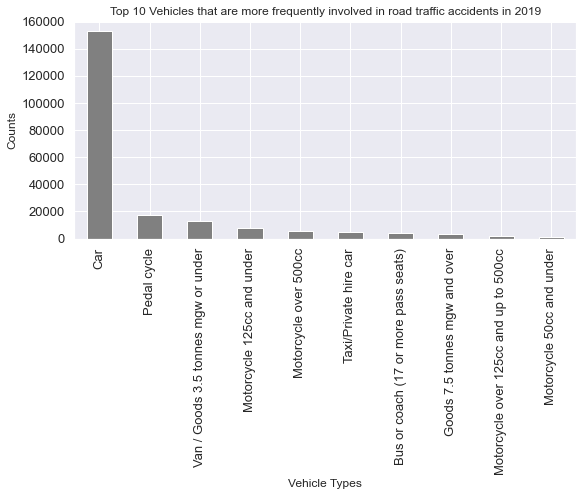

In [38]:
# Top 10 Vehicles that are more frequently involved in road traffic accidents in 2019
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
vehicle_type = df_vehicles['Vehicle_Type'].replace({1:"Pedal cycle",
                                                    2:"Motorcycle 50cc and under",
                                                    3:"Motorcycle 125cc and under",
                                                    4:"Motorcycle over 125cc and up to 500cc",
                                                    5:"Motorcycle over 500cc",
                                                    8:"Taxi/Private hire car",
                                                    9:"Car",
                                                    11:"Bus or coach (17 or more pass seats)",
                                                    19:"Van / Goods 3.5 tonnes mgw or under",
                                                    21:"Goods 7.5 tonnes mgw and over"}).value_counts().head(10)
print(vehicle_type)
vehicle_type.plot(kind="bar", color = "grey", fontsize=13)
plt.xlabel('Vehicle Types')
plt.ylabel('Counts')
plt.title('Top 10 Vehicles that are more frequently involved in road traffic accidents in 2019')
plt.show()

Let's examine 3 properties of the top 3 vehicle types

We shall examine:
1. Engine Capacity
2. Age of Vehicle
3. Vehicle_Manoeuvre

In [39]:
# Top 3 identified vehicle types: cars, pedal_cycle, and vans(3.5tonnes or less)
# drop (missing or out of range values) for ease of computation
cars = df_vehicles[df_vehicles.Vehicle_Type == 9]
cars = cars.replace(-1, np.nan)
pedal_cycle = df_vehicles[df_vehicles.Vehicle_Type == 0]
pedal_cycle = pedal_cycle.replace(-1, np.nan)
van_3point5_tons_or_under = df_vehicles[df_vehicles.Vehicle_Type == 19]
van_3point5_tons_or_under = van_3point5_tons_or_under.replace(-1, np.nan)

In [40]:
print(cars.loc[:, ('Age_of_Vehicle')].value_counts().head())
print(van_3point5_tons_or_under.loc[:, ('Age_of_Vehicle')].value_counts().head())

3.0    8814
4.0    8792
2.0    8306
1.0    8306
5.0    8129
Name: Age_of_Vehicle, dtype: int64
1.0    1252
2.0    1222
3.0    1099
4.0     904
5.0     717
Name: Age_of_Vehicle, dtype: int64


In [41]:
print(cars.loc[:, ('Engine_Capacity_(CC)')].value_counts().head())
print(van_3point5_tons_or_under.loc[:, ('Engine_Capacity_(CC)')].value_counts().head())

1598.0    11170
1968.0     5893
998.0      5798
1995.0     5130
1242.0     4886
Name: Engine_Capacity_(CC), dtype: int64
2198.0    1484
1995.0    1231
2143.0    1049
1560.0    1000
1598.0     809
Name: Engine_Capacity_(CC), dtype: int64


In [42]:
print(cars.loc[:, ('Age_Band_of_Driver')].value_counts().head())
print(van_3point5_tons_or_under.loc[:, ('Age_Band_of_Driver')].value_counts().head())

6.0    32093
7.0    24144
8.0    21189
5.0    14928
9.0    13877
Name: Age_Band_of_Driver, dtype: int64
6.0    3092
7.0    2315
8.0    2185
9.0    1254
5.0     855
Name: Age_Band_of_Driver, dtype: int64


In [43]:
# Check for characteristics of cars that most frequent in accidents
cars.loc[:, ('Age_of_Vehicle', 
             'Engine_Capacity_(CC)', 
             'Vehicle_Manoeuvre',
             'Was_Vehicle_Left_Hand_Drive?',
             'Vehicle_Location-Restricted_Lane', 
             'Vehicle_Leaving_Carriageway')].mode()

,Age_of_Vehicle,Engine_Capacity_(CC),Vehicle_Manoeuvre,Was_Vehicle_Left_Hand_Drive?,Vehicle_Location-Restricted_Lane,Vehicle_Leaving_Carriageway
0,3.0,1598.0,18.0,1.0,0.0,0.0


In [44]:
# Check for characteristics of pedal_cycle that most frequent in accidents
pedal_cycle.loc[:, ('Age_of_Vehicle', 
                    'Engine_Capacity_(CC)', 
                    'Vehicle_Manoeuvre', 
                    'Was_Vehicle_Left_Hand_Drive?',
                    'Vehicle_Location-Restricted_Lane', 
                    'Vehicle_Leaving_Carriageway')].mode()

,Age_of_Vehicle,Engine_Capacity_(CC),Vehicle_Manoeuvre,Was_Vehicle_Left_Hand_Drive?,Vehicle_Location-Restricted_Lane,Vehicle_Leaving_Carriageway


In [45]:
# Check for characteristics of vans that most frequent in accidents
van_3point5_tons_or_under.loc[:, ('Age_of_Vehicle', 
                                  'Engine_Capacity_(CC)', 
                                  'Vehicle_Manoeuvre',
                                  'Was_Vehicle_Left_Hand_Drive?',
                                  'Vehicle_Location-Restricted_Lane', 
                                  'Vehicle_Leaving_Carriageway')].mode()
                                  


,Age_of_Vehicle,Engine_Capacity_(CC),Vehicle_Manoeuvre,Was_Vehicle_Left_Hand_Drive?,Vehicle_Location-Restricted_Lane,Vehicle_Leaving_Carriageway
0,1.0,2198.0,18.0,1.0,0.0,0.0


In [46]:
cars['Was_Vehicle_Left_Hand_Drive?'].value_counts()

1.0    142962
2.0       854
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64

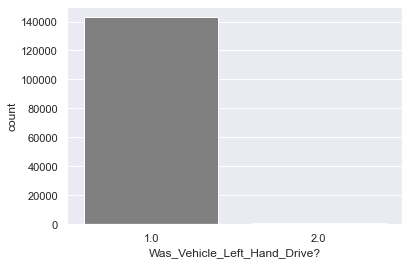

In [47]:
sns.countplot(x = 'Was_Vehicle_Left_Hand_Drive?', data = cars, color='grey')
plt.show()

<AxesSubplot:xlabel='Engine_Capacity_(CC)'>

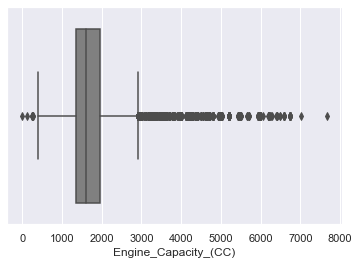

In [48]:
sns.boxplot(x=cars['Engine_Capacity_(CC)'], data = cars, color='grey')

<AxesSubplot:xlabel='Age_of_Vehicle'>

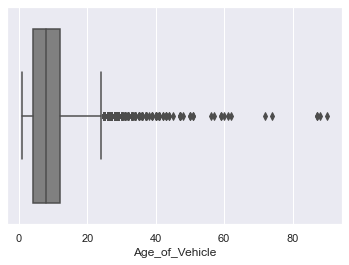

In [49]:
sns.boxplot(x=cars['Age_of_Vehicle'], data = cars, color='grey')

In [50]:
van_3point5_tons_or_under.loc[:, ('Age_of_Vehicle', 'Engine_Capacity_(CC)')].mode()

,Age_of_Vehicle,Engine_Capacity_(CC)
0,1.0,2198.0


In [51]:
van_3point5_tons_or_under['Was_Vehicle_Left_Hand_Drive?'].value_counts()

1.0    11697
2.0       86
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64

In [52]:
van_3point5_tons_or_under['Was_Vehicle_Left_Hand_Drive?'].value_counts()

1.0    11697
2.0       86
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64

## <font color = red>**_Question (G)_**</font>: Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?


To answer this question, lets look at the following conditions / situations:

1. Weather conditions
2. Geographical location 
3. Road surface conditions
4. Road type 
5. Urban/rural arease.t.c

In [53]:
df_accident['Weather_Conditions'] = df_accident['Weather_Conditions'].replace({1:"Fine no high winds",
                                                                                2:"Raining no high winds",
                                                                                3:"Snowing no high winds",
                                                                                4:"Fine with high winds",
                                                                                5:"Raining with high winds",
                                                                                6:"Snowing with high winds",
                                                                                7:"Fog or mist",
                                                                                8:"Other",
                                                                                9:"Unknwon",
                                                                                -1:"Data missing"})



Fine no high winds         92316
Raining no high winds      15294
Unknwon                     3436
Other                       3043
Raining with high winds     1430
Fine with high winds        1230
Fog or mist                  394
Snowing no high winds        353
Snowing with high winds       40
Name: Weather_Conditions, dtype: int64


<AxesSubplot:title={'center':'Weather Conditions'}>

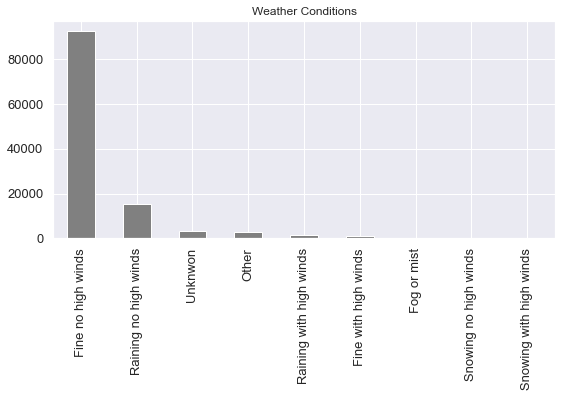

In [54]:
plt.figure(figsize=(9,4))
sns.set(style="darkgrid")
print(df_accident['Weather_Conditions'].value_counts())
df_accident['Weather_Conditions'].value_counts().plot(kind="bar",
                                                      fontsize=13,
                                                      color = "grey",
                                                      title = "Weather Conditions")

In [55]:
df_accident.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour'],
      dtype='object')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

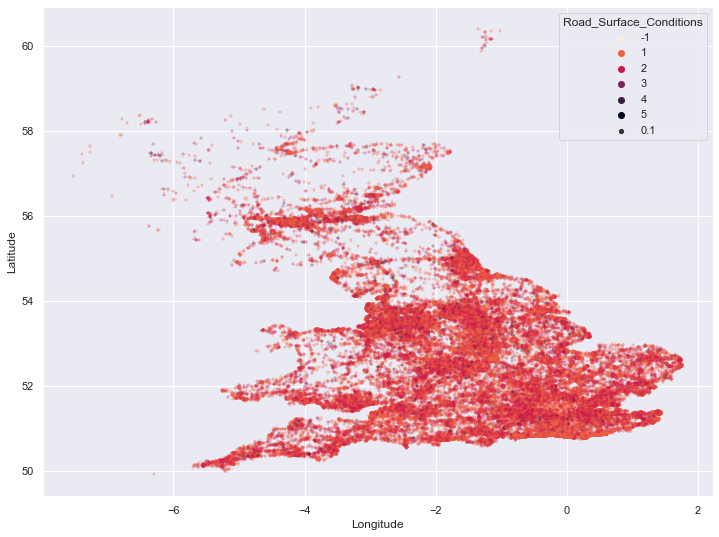

In [56]:
# Checking for effects of Weather Condition on accident occurance
plt.figure(figsize=(12,9))
sns.scatterplot(x=df_accident.Longitude, 
                y=df_accident.Latitude, 
                size=0.1,
                #style=df_accident.Accident_Severity,
                hue=df_accident.Road_Surface_Conditions,
                marker='+',
                palette='rocket_r',
               legend='auto',)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

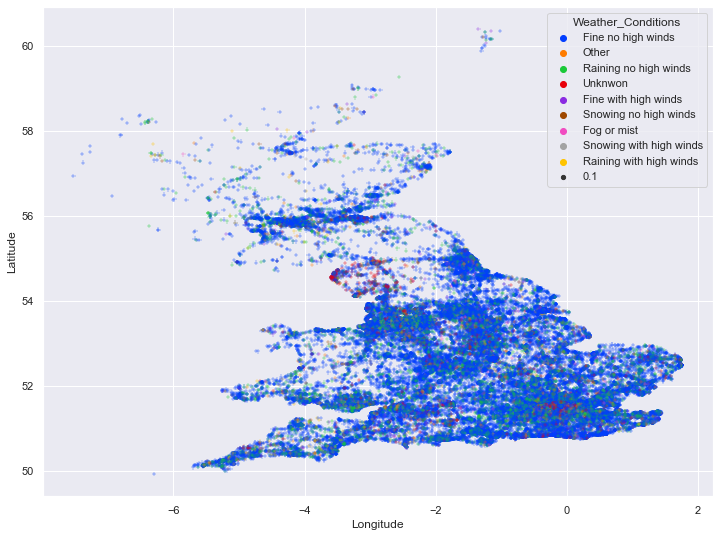

In [57]:
# Checking for effects of Weather Condition on accident occurance
plt.figure(figsize=(12,9))
sns.scatterplot(x=df_accident.Longitude, 
                y=df_accident.Latitude, 
                size=0.1,
                #style=df_accident.Accident_Severity,
                hue=df_accident.Weather_Conditions,
                marker='+',
                palette='bright',
               legend='auto',)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

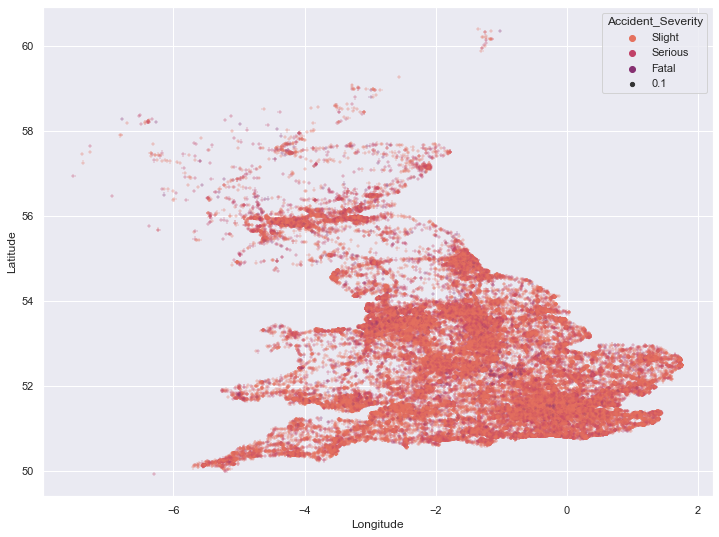

In [58]:
# Checking for Accident Severity at different location
plt.figure(figsize=(12,9))
sns.scatterplot(x=df_accident.Longitude, 
                y=df_accident.Latitude, 
                size=0.1,
                #style=df_accident.Accident_Severity,
                hue=df_accident.Accident_Severity,
                marker='+',
                palette='flare',
               legend='auto',)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

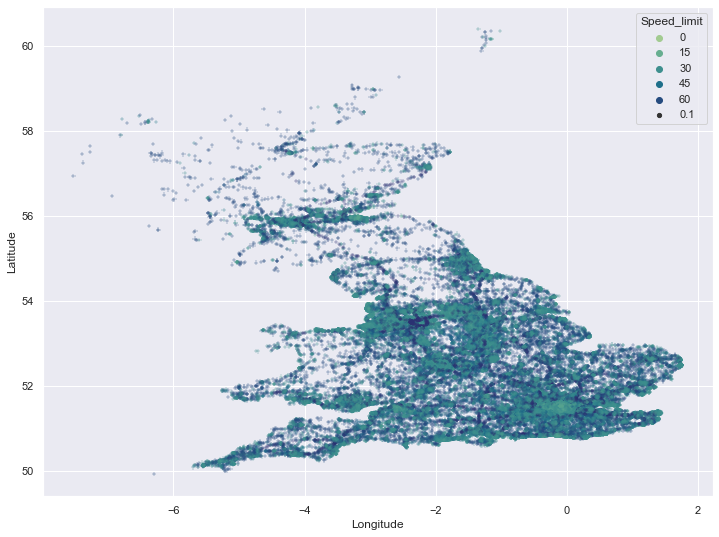

In [59]:
# Checking for Accident Severity at different location
plt.figure(figsize=(12,9))
sns.scatterplot(x=df_accident.Longitude, 
                y=df_accident.Latitude, 
                size=0.1,
                #style=df_accident.Accident_Severity,
                hue=df_accident.Speed_limit,
                marker='+',
                palette='crest',
               legend='auto',)

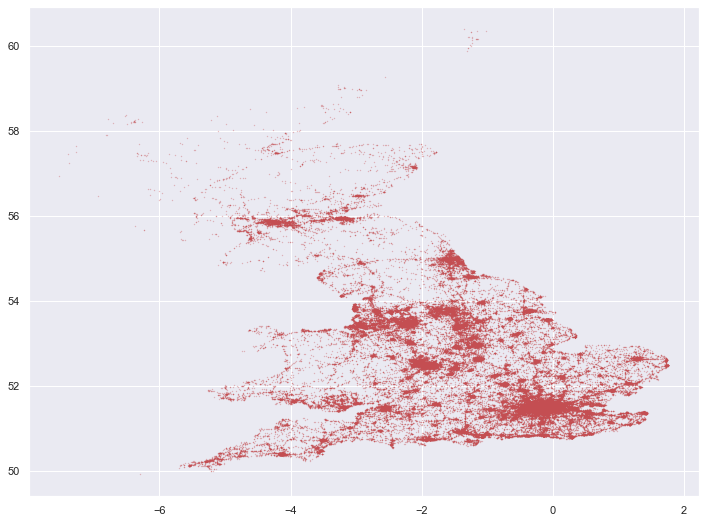

In [60]:
fig, axes = plt.subplots(figsize=(12,9))
axes.scatter(x=df_accident.Longitude, 
                y=df_accident.Latitude,
                s=0.1, alpha=0.5, c='r')

Text(0.5, 0, 'Age of Drivers')

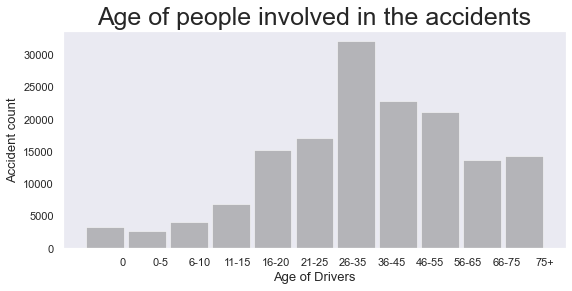

In [61]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(9,4))
df_casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'grey',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 13)
plt.xlabel('Age of Drivers', fontsize = 13)

<AxesSubplot:>

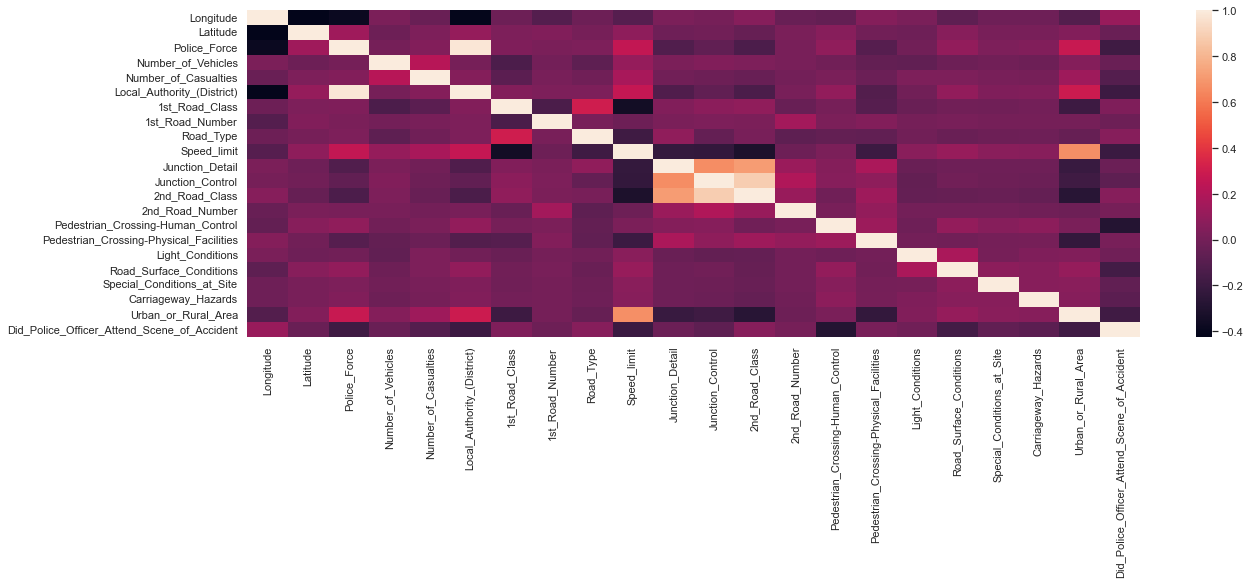

In [62]:
corr =  df_accident.corr()
plt.subplots(figsize=(20,6))
sns.heatmap(corr)

As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable.

There is only one postiive strong correlation between speed limit and Urban or Rural Area.

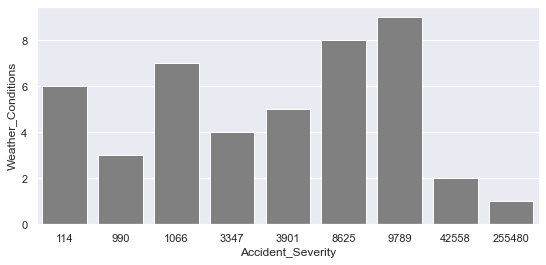

In [63]:
plt.figure(figsize=(9,4))
df_accident = pd.read_csv('Road Safety Data - Accidents 2019.csv', low_memory=False)
grouper_a = df_accident[['Weather_Conditions','Accident_Severity']]
weather_severity = grouper_a.groupby(by = 'Weather_Conditions',as_index=False).sum()
plt = sns.barplot(weather_severity['Accident_Severity'],
                  weather_severity['Weather_Conditions'],
                 color= 'grey')

<AxesSubplot:title={'center':'Urban or Rural Area'}>

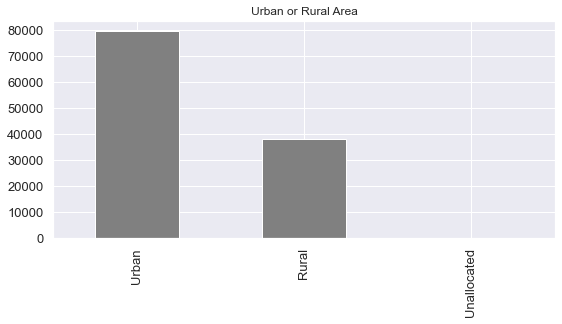

In [64]:
df_accident['Urban_or_Rural_Area']=df_accident['Urban_or_Rural_Area'].replace({1:"Urban",2:"Rural", 
                                                                    3:"Unallocated"})

df_accident['Urban_or_Rural_Area'].value_counts().plot(kind="bar", 
                                                     title = 'Urban or Rural Area',fontsize = 13, 
                                                       color='grey', figsize=(9,4))   

<AxesSubplot:title={'center':'Road Surface Conditions'}>

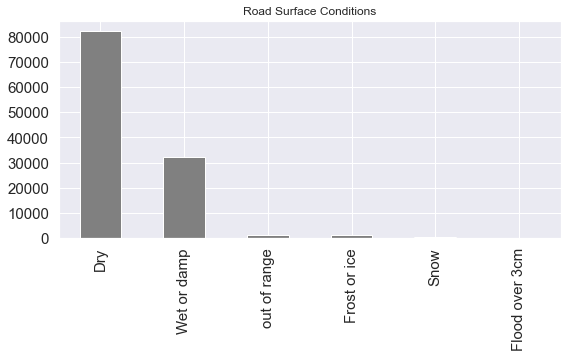

In [65]:
df_accident['Road_Surface_Conditions']=df_accident['Road_Surface_Conditions'].replace({ 1:"Dry",2:"Wet or damp",
                3:"Snow",  4:"Frost or ice", 5:"Flood over 3cm", 6:"Oil or diesel", 7:"Mud",-1:"out of range"})                             
                                                                                        

df_accident['Road_Surface_Conditions'].value_counts().plot(kind="bar", title = 'Road Surface Conditions', fontsize = 15,
                                                                                color='grey', figsize=(9,4))
                                                                                                               

## <font color = red>**_Question (H)_**</font>: How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

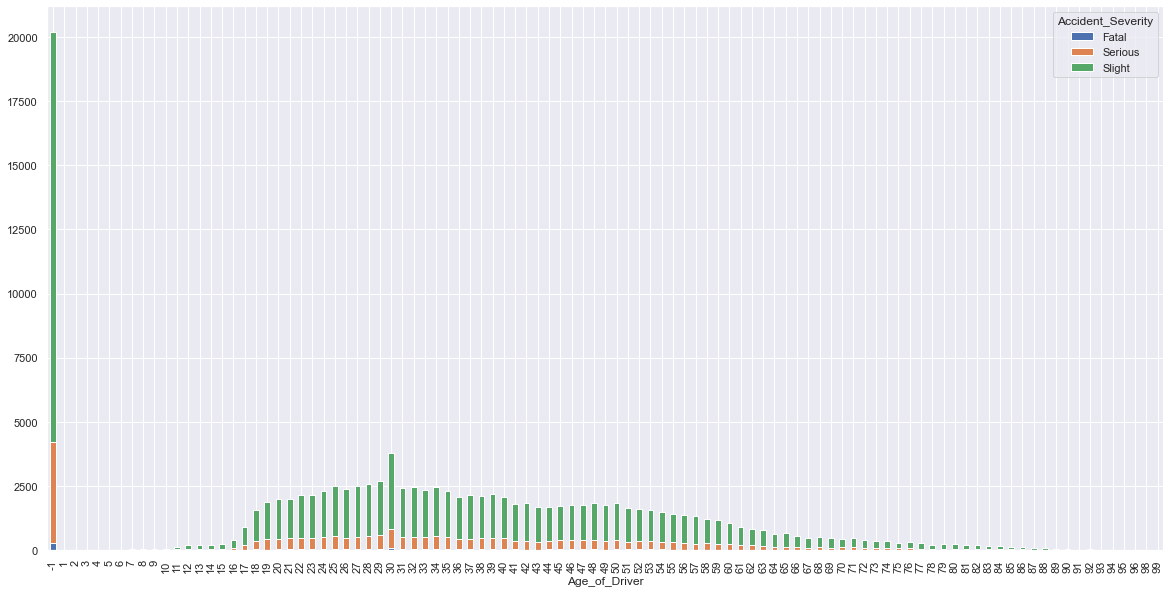

In [66]:
age_grouped_severity = df_accident_vehicles[['Accident_Severity','Age_of_Driver']].groupby(['Age_of_Driver',
                        'Accident_Severity'])['Accident_Severity'].count().unstack('Accident_Severity').fillna(0)

age_grouped_severity.plot(kind='bar', stacked=True, figsize = (20,10));

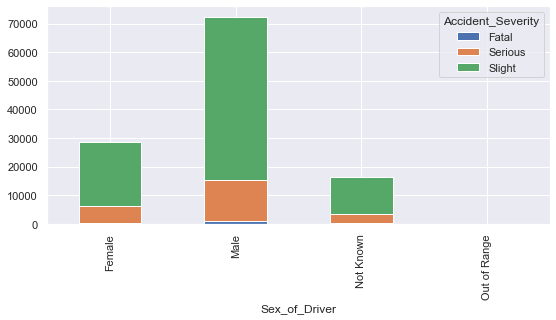

In [67]:
df_accident_vehicles['Sex_of_Driver'] = df_accident_vehicles['Sex_of_Driver'].replace({1:"Male",
                                                                       2:"Female",
                                                                       3:"Not Known",
                                                                       -1:"Out of Range"})

gender_grouped_severity = df_accident_vehicles[['Accident_Severity','Sex_of_Driver']].groupby(['Sex_of_Driver',
                        'Accident_Severity'])['Accident_Severity'].count().unstack('Accident_Severity').fillna(0)

gender_grouped_severity.plot(kind='bar', stacked=True, figsize = (9,4));

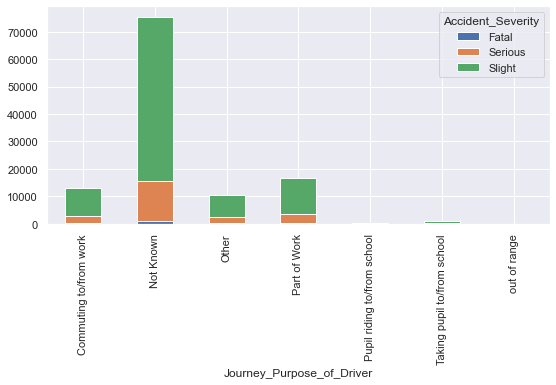

In [68]:
df_accident_vehicles['Journey_Purpose_of_Driver']=df_accident_vehicles['Journey_Purpose_of_Driver'].replace({1:"Part of Work",
                                                                                    2:"Commuting to/from work",
                                                                                    3:"Taking pupil to/from school",
                                                                                    4:"Pupil riding to/from school",
                                                                                    5:"Other",
                                                                                    6:"Not Known",
                                                                                    15:"other/not known",
                                                                                    -1:"out of range"})

journey_grouped_severity = df_accident_vehicles[['Accident_Severity','Journey_Purpose_of_Driver']].groupby(['Journey_Purpose_of_Driver',
                        'Accident_Severity'])['Accident_Severity'].count().unstack('Accident_Severity').fillna(0)

journey_grouped_severity.plot(kind='bar', stacked=True, figsize = (9,4));


-1     29756
 30     6423
 29     4734
 25     4675
 28     4579
 32     4431
 27     4413
Name: Age_of_Driver, dtype: int64


<AxesSubplot:title={'center':'Age of Driver'}>

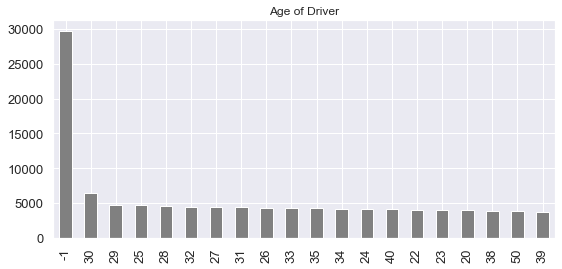

In [69]:
print(df_vehicles['Age_of_Driver'].value_counts().head(7))
df_vehicles['Age_of_Driver'].value_counts().head(20).plot(kind="bar",figsize=(9,4), 
                                                         color='grey',
                                                         fontsize=13,
                                                         title='Age of Driver')

Male            134592
Female           58384
Not Known        23404
Out of Range         1
Name: Sex_of_Driver, dtype: int64


<AxesSubplot:title={'center':'Sex of driver'}>

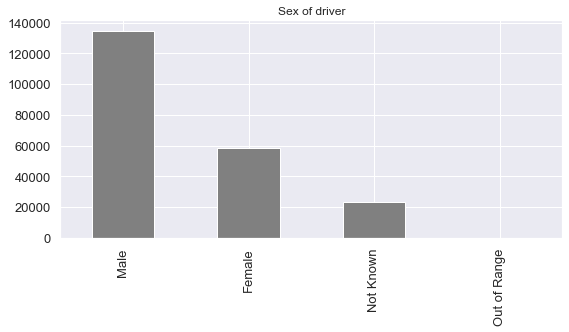

In [70]:
df_vehicles['Sex_of_Driver'] = df_vehicles['Sex_of_Driver'].replace({1:"Male",
                                                                       2:"Female",
                                                                       3:"Not Known",
                                                                       -1:"Out of Range"})
print(df_vehicles['Sex_of_Driver'].value_counts())
df_vehicles['Sex_of_Driver'].value_counts().plot(kind="bar", 
                                                 title = 'Sex of driver', 
                                                 fontsize = 13,
                                                 color='grey', figsize=(9,4))

Not Known                      128259
Part of Work                    30692
Other                           29807
Commuting to/from work          24390
Taking pupil to/from school      2356
Pupil riding to/from school       819
out of range                       58
Name: Journey_Purpose_of_Driver, dtype: int64


<AxesSubplot:title={'center':'Journey Purpose of Driver'}>

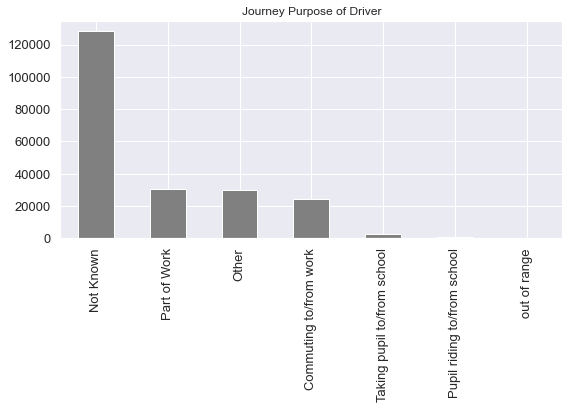

In [71]:
df_vehicles['Journey_Purpose_of_Driver']=df_vehicles['Journey_Purpose_of_Driver'].replace({1:"Part of Work",
                                                                                    2:"Commuting to/from work",
                                                                                    3:"Taking pupil to/from school",
                                                                                    4:"Pupil riding to/from school",
                                                                                    5:"Other",
                                                                                    6:"Not Known",
                                                                                    15:"other/not known",
                                                                                    -1:"out of range"})
print(df_vehicles['Journey_Purpose_of_Driver'].value_counts())
df_vehicles['Journey_Purpose_of_Driver'].value_counts().plot(kind="bar", figsize=(9,4),
                                                         color='grey', fontsize=13,title='Journey Purpose of Driver')


26-35           45993
36-45           35341
56-55           32281
out of range    29756
21-25           20568
56-65           20344
16-20           13947
65-75            9848
over 75          6169
11-15            1727
6-10              364
0-5                43
Name: Age_Band_of_Driver, dtype: int64


<AxesSubplot:title={'center':'Age Band of Driver'}>

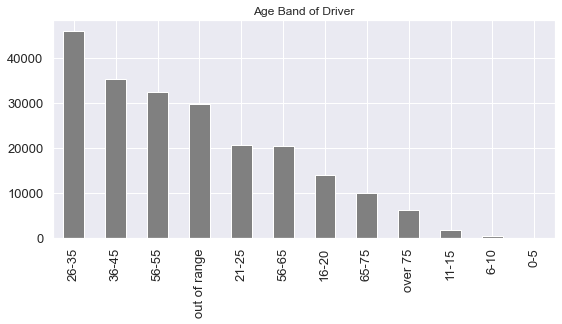

In [72]:
df_vehicles['Age_Band_of_Driver'] = df_vehicles['Age_Band_of_Driver'].replace({1:"0-5",
                                                                               2:"6-10",
                                                                               3:"11-15",
                                                                               4:"16-20",
                                                                               5:"21-25",
                                                                               6:"26-35",
                                                                               7:"36-45",
                                                                               8:"56-55",
                                                                               9:"56-65",
                                                                               10:"65-75",
                                                                               11:"over 75",
                                                                               -1:"out of range"})
print(df_vehicles['Age_Band_of_Driver'].value_counts())
df_vehicles['Age_Band_of_Driver'].value_counts().plot(kind="bar", figsize=(9,4),
                                                         color='grey',
                                                         fontsize=13,
                                                         title='Age Band of Driver')


### Conduct analysis on frequency of accidents across time (Trend analysis)

In [73]:
# Missing values in the data are denoted as '-1'. We replace them with nan from the numpy package
df_accident[df_accident==-1]= np.nan
df_accident[df_accident=='-1']= np.nan

In [74]:
# Aggregate by date
dailydf = df_accident.groupby('Date').size()
type(dailydf)
dailydf = dailydf.reset_index(name = 'daycount')
dailydf.head()

,Date,daycount
0,01/01/2019,231
1,01/02/2019,318
2,01/03/2019,305
3,01/04/2019,312
4,01/05/2019,309


In [75]:
# Calculate summary statistics
dailydf.describe()

,daycount
count,365.000000
mean,322.016438
std,58.637972
min,137.000000
25%,289.000000
50%,323.000000
75%,360.000000
max,495.000000


In [76]:
# Conduct simple linear regression of the time series of accident counts. The predicted 
# fitted values are for the mapping of the trendline. The "tindex" column is for the trendline,

x = pd.Series(np.arange(len(dailydf))+1)
x = sm.add_constant(x) #intercept
y= dailydf['daycount']
regression = sm.OLS(y,x).fit()
display(regression.summary())
display(regression.params)
dailydf['tindex'] = x = pd.Series(np.arange(len(dailydf))+1)
dailydf['fitted'] = regression.fittedvalues
dailydf.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               daycount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1990
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.656
Time:                        13:55:30   Log-Likelihood:                -2003.4
No. Observations:                 365   AIC:                             4011.
Df Residuals:                     363   BIC:                             4019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.3971      6.158     52.680      0.000     312.287     336.507
0             -0.0130      0.029     -0.446      0.656      -0.070       0.044
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.596
Skew:                          -0.211   Prob(JB):                        0.166
Kurtosis:                       3.242   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    324.397110
0         -0.013009
dtype: float64

,Date,daycount,tindex,fitted
0,01/01/2019,231,1,324.384101
1,01/02/2019,318,2,324.371091
2,01/03/2019,305,3,324.358082
3,01/04/2019,312,4,324.345073
4,01/05/2019,309,5,324.332064


<AxesSubplot:xlabel='Date', ylabel='Number of Accidents'>

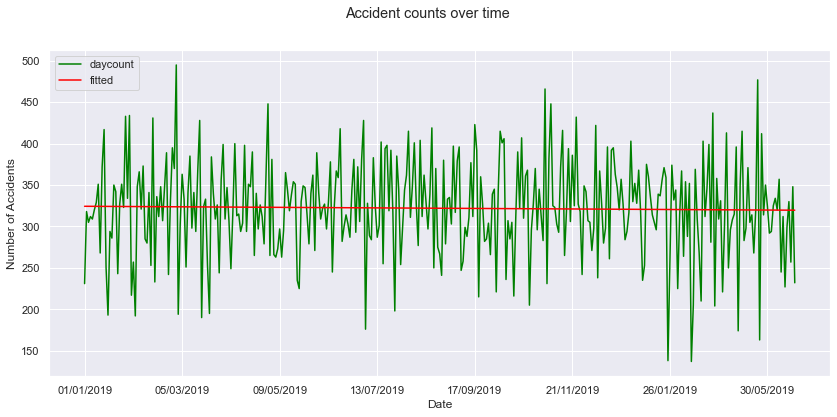

In [77]:
import matplotlib.pyplot as plt
FIG_SIZE = (14, 6)
fig,ax = plt.subplots(figsize = FIG_SIZE)
dailydf.plot(kind = 'line',x = 'Date',y='daycount',ax=ax, color='green')
fig.suptitle('Accident counts over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
dailydf.plot(kind = 'line',x = 'Date',y='fitted',ax=ax, color='red')

### Report:

From the data, we see that reported accidents in UK average about 315 per day, with a standard deviation of around 75. A linear regression of accident counts against the time trend indicate that average accident rates per day has remained somewhat constant, seen by the statistically insignificant coefficient of the time trend value (p-value is 0.172).

This would mean that accident rates in UK is significantly higher in the months of April, September, and November we now need to investigate why the rates of accidents in these months are relatively higher than other months.

### Seasonality analysis

From our previous plot, accident rates seem to display some cyclic behaviour, with lower accident rates at the beginning of the year, compared to the end of the year.

We shall attempt to delve deeper into this behaviour by running a seasonality analysis. To do so, each month will be transformed into dummy variables. A regression with each month as their respective dummy variables will be conducted to ascertain if there is a seasonality effect. Lastly, the relative seasonality for each months will be plotted.



In [78]:
# Construct dummy Variables for each month
dailydf['Date'] =pd.to_datetime(dailydf['Date'])
dailydf['month'] =dailydf['Date'].dt.month
dailydf['Jan']= np.where(dailydf['month']==1, 1, 0)
dailydf['Feb']= np.where(dailydf['month']==2, 1, 0)
dailydf['Mar']= np.where(dailydf['month']==3, 1, 0)
dailydf['Apr']= np.where(dailydf['month']==4, 1, 0)
dailydf['May']= np.where(dailydf['month']==5, 1, 0)
dailydf['Jun']= np.where(dailydf['month']==6, 1, 0)
dailydf['Jul']= np.where(dailydf['month']==7, 1, 0)
dailydf['Aug']= np.where(dailydf['month']==8, 1, 0)
dailydf['Sep']= np.where(dailydf['month']==9, 1, 0)
dailydf['Oct']= np.where(dailydf['month']==10, 1, 0)
dailydf['Nov']= np.where(dailydf['month']==11, 1, 0)
dailydf['Dec']= np.where(dailydf['month']==12, 1, 0)
# dailydf['month'] =dailydf['month'].apply(str)
dailydf.head(10)

,Date,daycount,tindex,fitted,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2019-01-01,231,1,324.384101,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-02,318,2,324.371091,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-03,305,3,324.358082,1,1,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-04,312,4,324.345073,1,1,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-05,309,5,324.332064,1,1,0,0,0,0,0,0,0,0,0,0,0
5,2019-01-06,320,6,324.319055,1,1,0,0,0,0,0,0,0,0,0,0,0
6,2019-01-07,329,7,324.306046,1,1,0,0,0,0,0,0,0,0,0,0,0
7,2019-01-08,351,8,324.293037,1,1,0,0,0,0,0,0,0,0,0,0,0
8,2019-01-09,268,9,324.280028,1,1,0,0,0,0,0,0,0,0,0,0,0
9,2019-01-10,372,10,324.267018,1,1,0,0,0,0,0,0,0,0,0,0,0


In [79]:
# Conduct Regression with month dummy variables to find seasonality effect
varselect = ['tindex','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
# December is left out as the objective of the analysis is to determine the relative mean
#accident rate of each month compared to December 

x = dailydf[varselect]
x = sm.add_constant(x)
y = dailydf['daycount']
regression = sm.OLS(y,x).fit()
display(regression.summary())
season = regression.params.reset_index(name = 'Seasonality')
season = season.iloc[2:,:]
display(season)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               daycount   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.690
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0672
Time:                        13:55:31   Log-Likelihood:                -1993.2
No. Observations:                 365   AIC:                             4012.
Df Residuals:                     352   BIC:                             4063.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.4427     12.179     25.162      0.000     282.491     330.395
tindex        -0.0184      0.029     -0.627      0.531      -0.076       0.039
Jan           15.1977     14.824      1.025      0.306     -13.958      44.353
Feb           21.6138     15.265      1.416      0.158      -8.409      51.636
Mar            2.4217     14.793      0.164      0.870     -26.671      31.515
Apr            7.0957     14.917      0.476      0.635     -22.242      36.433
May           19.3566     14.767      1.311      0.191      -9.686      48.399
Jun           18.7278     14.890      1.258      0.209     -10.557      48.013
Jul           20.2915     14.748      1.376      0.170      -8.713      49.296
Aug           15.5818     14.740      1.057      0.291     -13.409      44.572
Sep           35.6927     14.863      2.401      0.017       6.462      64.924
Oct           20.0651     14.731      1.362      0.174      -8.906      49.036
Nov           52.7581     14.853      3.552      0.000      23.547      81.970
==============================================================================
Omnibus:                        2.470   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.197
Skew:                          -0.159   Prob(JB):                        0.333
Kurtosis:                       3.210   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,index,Seasonality
2,Jan,15.197710
3,Feb,21.613829
4,Mar,2.421734
5,Apr,7.095743
6,May,19.356623
7,Jun,18.727848
8,Jul,20.291512
9,Aug,15.581835
10,Sep,35.692673
11,Oct,20.065111



From the above regression, it can be seen that November is statistically significant month (as its p-value is <0.05).

Text(0, 0.5, 'Relative Seasonality')

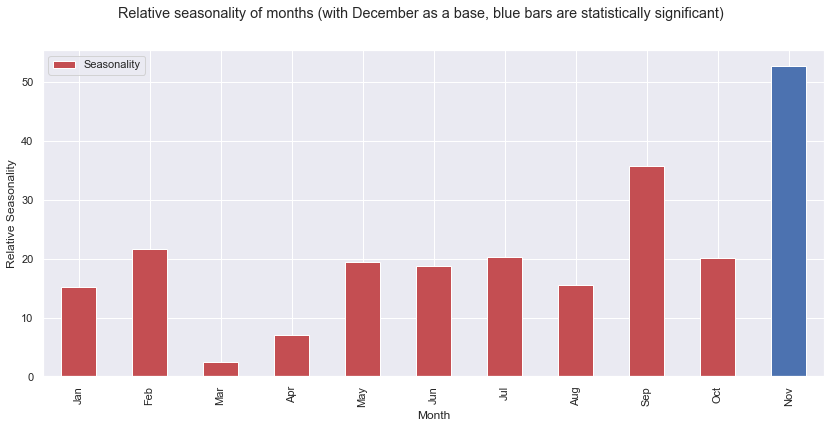

In [80]:
import matplotlib.pyplot as plt
# Plot seasonality
colors = {'Jan':'r','Feb':'r','Mar':'r','Apr':'r','May':'r',
          'Jun':'r','Jul':'r','Aug':'r','Sep':'r',
          'Oct':'r','Nov':'b'}

fig,ax = plt.subplots(figsize = FIG_SIZE)
bar = season.plot(kind = 'bar',x = 'index',y='Seasonality',
                  ax=ax,  color=[colors[t] for t in season['index']])
fig.suptitle('Relative seasonality of months (with December as a base, blue bars are statistically significant)')
ax.set_xlabel('Month')
ax.set_ylabel('Relative Seasonality')


Text(0, 0.5, 'Accident Count')

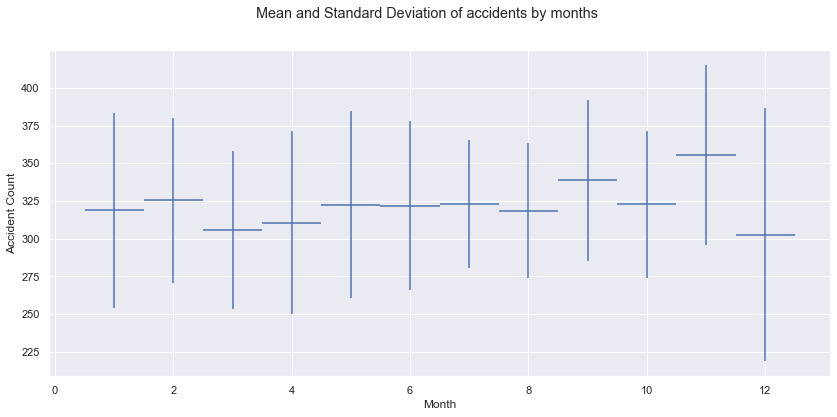

In [81]:
mean = dailydf.groupby('month')['daycount'].mean()
std = dailydf.groupby('month')['daycount'].std()
fig,ax = plt.subplots(figsize = FIG_SIZE)
plt.errorbar(mean.index, mean, xerr=0.5, yerr=std, linestyle='')

plt.suptitle('Mean and Standard Deviation of accidents by months')
ax.set_xlabel('Month')
ax.set_ylabel('Accident Count')

This plot shows the mean and standard deviation of accidents per month. We once again see a pattern with accident rates rising through the months from December onwards till November.

We thus can conclude that the accident data does exhibit seasonality.

### Time of Day Analysis

We now look at how frequent accidents are across the days. We hypothesize that accidents are more prevalent at night, as lighting conditions are worse. We also expect accidents at night to be more severe, since drivers may be unable to see pedestrians or other drivers clearly before the collision. They may hence find it difficult to swerve or otherwise take steps to reduce the severity of the impact before collision.

To test this hypothesis, we decided to plot a stacked area chart. We chose to plot a stacked area chart due to the time values being continous. The stacked area chart will also display the "density" of the frequency of accidents (analogous to a probability distribution) in their respective categories (Slight, Serious and Fatal), and will allow us to determine if the frequency of accidents is higher at certain times of the day.

In [82]:
# Construct an 'hour accident happened' variable using the time accident happened variable

df_accident['hour'] = df_accident['Time'].str[0:2]
df_accident['hour'] = df_accident['hour'].apply(float)
df_accident.dtypes
# df.head()

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_D

In [83]:
hour_occur = (df_accident.groupby(['hour','Accident_Severity']).size())
hour_occur = hour_occur.reset_index(name = 'count')
hour_occur = pd.pivot_table(hour_occur,
                    index = "hour",
                    columns = 'Accident_Severity',
                    values = 'count')
hour_occur = hour_occur.reset_index()
hour_occur['hour'] = hour_occur['hour'].apply(int)
hour_occur.head()

Accident_Severity,hour,1,2,3
0,0,57,452,1321
1,1,39,338,950
2,2,30,256,680
3,3,28,208,591
4,4,25,195,571


In [84]:
# Accident severity at different hours of the day
hour_occur.value_counts().head()

hour  1   2    3   
0     57  452  1321    1
1     39  338  950     1
22    80  791  2490    1
21    62  808  2833    1
20    74  951  3511    1
dtype: int64

Text(0.5, 0, 'Hour of Day (24hrs)')

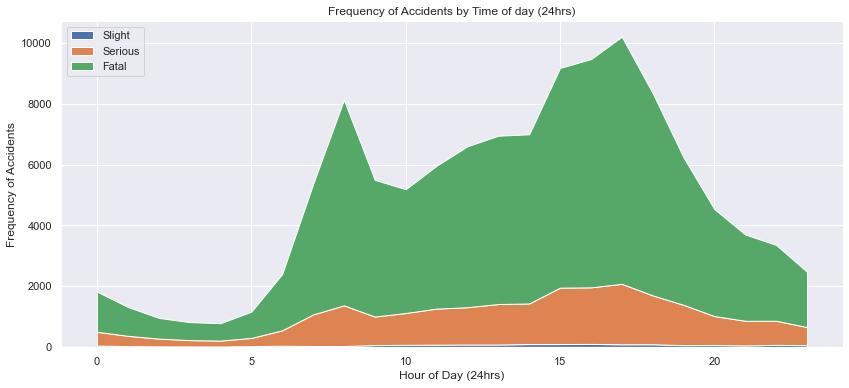

In [85]:
fig,ax = plt.subplots(figsize = FIG_SIZE)
x=hour_occur['hour']
y=[ hour_occur[1], hour_occur[2], hour_occur[3] ]
 
colors =  sns.color_palette("Set1")
plt.stackplot(x,y, labels=['Slight','Serious','Fatal'])
plt.legend(loc='upper left')
plt.title('Frequency of Accidents by Time of day (24hrs)')
plt.ylabel('Frequency of Accidents')
plt.xlabel('Hour of Day (24hrs)')

This stacked area plot of the accident frequency indicates that our hypothesis is incorrect. Not only are there fewer accidents during the night (defined as 8pm-6am), but these accidents are also less severe (as indicated by the area for the frequency of fatal accidents taking up a greater proportion of whole during the day).

It seems that accidents are more frequent and severe during certain periods of the day: Around 7am in the morning, and around 5pm in the evening. This suggests that accidents are likely to be caused more by congestion during rush hours, than by poor environment conditions.

### Frequency of accidents on roads and speed limits

We decided to further look at the frequency of accidents for each speed limit to determine if reckless driving at high speeds are a factor in causing more accidents.

In [103]:
# Create dataset to sort on speed
speedlimit = (df_accident.groupby(['Date','Speed_limit']).size())
speedlimit = speedlimit.reset_index(name = 'count')

speedlimit.head(6)

,Date,Speed_limit,count
0,2019-01-01,20.0,16
1,2019-01-01,30.0,137
2,2019-01-01,40.0,21
3,2019-01-01,50.0,10
4,2019-01-01,60.0,33
5,2019-01-01,70.0,14


In [87]:
# Check averages
speedavg = speedlimit.groupby('Speed_limit').mean()
speedavg = speedavg.reset_index()
speedavg

,Speed_limit,count
0,20.0,32.183562
1,30.0,189.876712
2,40.0,27.454795
3,50.0,12.920548
4,60.0,39.764384
5,70.0,19.597260


Text(0, 0.5, 'Accident count')

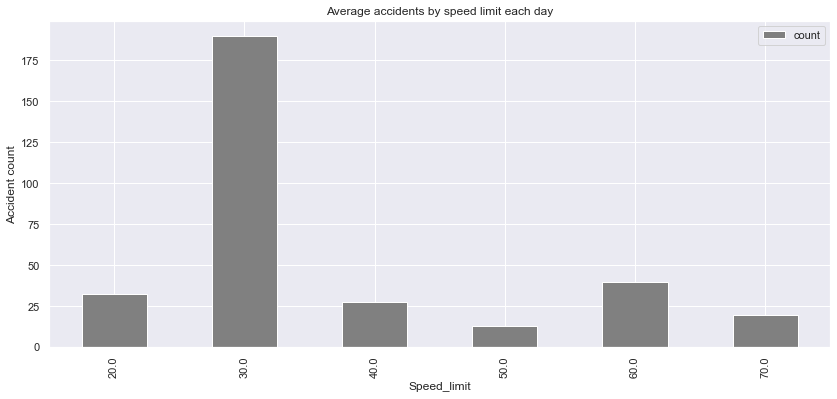

In [88]:
# Graph Means
fig,ax = plt.subplots(figsize=FIG_SIZE)
speedavg.plot(kind = 'bar',x = 'Speed_limit', y = 'count', ax = ax, color = 'grey')
ax.set_title('Average accidents by speed limit each day')
ax.set_ylabel("Accident count")

It would appear that roads with a speed limit of 30 have the most accidents. This is curious as we would expect roads with a higher speed limit to have more accidents due to the difficulty of reacting in time to any unexpected road conditions.

As the bar graph shows aggregated data, we also decided to plot a time series of the frequency of accidents for each speed limit to determine if the speed limit of 30 was due to a one-off mass collusion.

In [89]:
# Graph rate over time
speedTS = pd.pivot_table(speedlimit,
                    index = "Date",
                   columns = 'Speed_limit',
                   values = 'count')
speedTS = speedTS.reset_index()
speedTS.head()

Speed_limit,Date,20.0,30.0,40.0,50.0,60.0,70.0
0,01/01/2019,16,137,21,10,33,14
1,01/02/2019,26,209,20,6,38,19
2,01/03/2019,43,176,24,13,38,11
3,01/04/2019,41,192,25,10,35,9
4,01/05/2019,34,187,29,8,31,19


Text(0, 0.5, 'Accident counts')

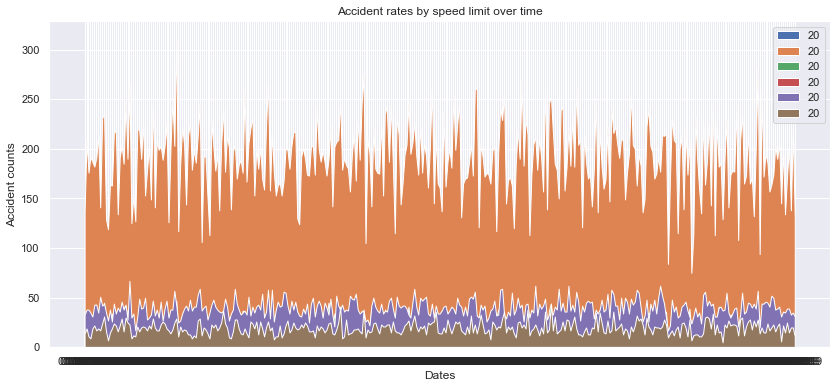

In [90]:
# Graph accident frequency over time by speed limit
x = speedTS['Date']
y = [speedTS[20],speedTS[30],speedTS[40],speedTS[50],speedTS[60],speedTS[70]]
fig,ax = plt.subplots(figsize=FIG_SIZE)
for i in y:
    plt.stackplot(x,i, labels=['20','30','40', '50', '60', '70'])
plt.legend(loc='upper right')    
plt.title('Accident rates by speed limit over time')
plt.xlabel('Dates')
plt.ylabel('Accident counts')

As shown by the graph, the higher accident rate of roads in speed limit 30 is consistent across the whole dataset. A possible cause may be the fact that 30 is the default speed limit in many UK roads.

To test this hypothesis, we decided to make a stacked bar chart of the count of accidents by road type, split by whether or not the speed limit is 30 for that particular type.

In [91]:
# Group by road types and whether the speed limit is 30 or not
df_accident['speedlimit30']= np.where(df_accident['Speed_limit']==30, 'is_30', 'not_30')
road = df_accident.groupby(['Road_Type','speedlimit30']).size()
road = road.reset_index(name = 'count')

display(road)

# Rename Road types according to website's provided data dictionary
road = road.replace(1,'Roundabout')
road = road.replace(2,'One way street')
road = road.replace(3,'Dual carriageway')
road = road.replace(6,'Single carriageway')
road = road.replace(7,'Slip road')
road = road.replace(9,'Unknown')
road = road.replace(12,'One way street/Slip road')
road = road.replace(-1,'Data missing or out of range')

# Pivot data for graph
road =  pd.pivot_table(road,
                    index = "Road_Type",
                   columns = 'speedlimit30',
                   values = 'count')

road

,Road_Type,speedlimit30,count
0,1,is_30,4220
1,1,not_30,2660
2,2,is_30,1697
3,2,not_30,967
4,3,is_30,5963
5,3,not_30,12627
6,6,is_30,55562
7,6,not_30,29758
8,7,is_30,629
9,7,not_30,1310


speedlimit30,is_30,not_30
Road_Type,,
Dual carriageway,5963,12627
One way street,1697,967
Roundabout,4220,2660
Single carriageway,55562,29758
Slip road,629,1310
Unknown,1234,909


Text(0, 0.5, 'Accident count')

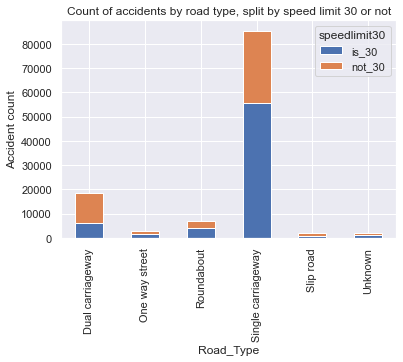

In [92]:
# Create stacked bar chart
FIG_SIZE = (20, 6)
fig,ax = plt.subplots()

road.plot(kind = 'bar',
         stacked = True,
         ax=ax)

ax.set_title('Count of accidents by road type, split by speed limit 30 or not')
ax.set_ylabel("Accident count")

The graph indicates that the 'Single carriageway' road type has the most accidents. This is understandable, as a single carriageway is a 2 way road with one lane in each direction, without any middle-of-road barriers. To overtake traffic on such roads, cars would have to overtake on the lane with oncoming traffic, which is dangerous.

We see that the majority of single carriageway roads have the speed limit of 30. This helps to explain why there is such a high rate of accidents on speed limit 30 roads.

### Feature Importance

We now attempt to see which features in the dataset proves useful for predicting accident severity.

## <font color = red>**_Question (I)_**</font>: Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?

## Machine Learning model

In [93]:
#Construct an 'hour accident happened' variable using the time accident happened variable

df_accident['hour'] = df_accident['Time'].str[0:2]
df_accident['hour'] = df_accident['hour'].apply(float)
df_accident.dtypes
# df.head()

# If the conversion fails for any particular string then those rows are set to NaT
df_accident['Date'] = pd.to_datetime(df_accident['Date'], errors='coerce')

# One-hot-encode months
df_accident['month'] = df_accident['Date'].dt.month
df_accident['Jan']= np.where(df_accident['month']==1, 1, 0)
df_accident['Feb']= np.where(df_accident['month']==2, 1, 0)
df_accident['Mar']= np.where(df_accident['month']==3, 1, 0)
df_accident['Apr']= np.where(df_accident['month']==4, 1, 0)
df_accident['May']= np.where(df_accident['month']==5, 1, 0)
df_accident['Jun']= np.where(df_accident['month']==6, 1, 0)
df_accident['Jul']= np.where(df_accident['month']==7, 1, 0)
df_accident['Aug']= np.where(df_accident['month']==8, 1, 0)
df_accident['Sep']= np.where(df_accident['month']==9, 1, 0)
df_accident['Oct']= np.where(df_accident['month']==10, 1, 0)
df_accident['Nov']= np.where(df_accident['month']==11, 1, 0)
df_accident['Dec']= np.where(df_accident['month']==12, 1, 0)

# Construct hour variable
df_accident['hour'] = df_accident['Time'].str[0:2]
df_accident['hour'] = df_accident['hour'].apply(float)

# Set severity to be 'Death' or 'Non Death' only (instead of 3 levels "slight, serious, fatal")
df_accident['Severitypredict'] = np.where(df_accident['Accident_Severity']==3, 1, 0)
# Set speedlimit30 to be two numerical outputs only
df_accident['speedlimit30'] = np.where(df_accident['speedlimit30']==2, 1, 0)
# Drop unwanted variables
deselected = ['Accident_Severity',
            'Time',
            'Date']
df_accident_new = df_accident.drop(deselected, axis=1)
display(df_accident_new.head())
display(df_accident_new.dtypes)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,hour,speedlimit30,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Severitypredict
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,2,3,2,1,E09000033,3,4202,1,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1,Dry,0.0,0.0,Urban,3,E01004762,17.0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,2,1,3,9,E09000022,3,23,2,30.0,0.0,NaN,NaN,0.0,NaN,NaN,4.0,1,Dry,0.0,0.0,Urban,3,E01003117,21.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,2,1,3,2,E09000007,4,504,6,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1,Dry,0.0,0.0,Urban,1,E01000943,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,1,1,3,2,E09000007,4,510,6,20.0,3.0,4.0,4.0,510.0,0.0,0.0,4.0,1,Dry,0.0,0.0,Urban,1,E01000973,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,2,2,3,28,E09000005,3,4003,6,30.0,6.0,4.0,6.0,0.0,0.0,0.0,4.0,1,Dry,0.0,0.0,Urban,1,E01000546,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_Detail                                float64
Junction_Control                               float64
2nd_Road_Class                                 float64
2nd_Road_N

In [94]:
# Split data into Y and X
y = df_accident_new['Severitypredict']
x = df_accident_new.drop('Severitypredict', axis=1)
display(x.shape)
display(y.shape)

(117536, 44)

(117536,)

In [95]:
# Split into Train/Test
seed = 123
testpercent = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = testpercent) 
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(88152, 44)

(29384, 44)

(88152,)

(29384,)

In [96]:
# Fit the Xgb Model
xgb_model = xgb.XGBClassifier(eta=0.1, 
                                  nrounds=1000, 
                                  max_depth=8, 
                                  colsample_bytree=0.5, 
                                  scale_pos_weight=1.1, 
                                  booster='gbtree', 
                                  metric='multi:softmax')

y_pred = xgb_model.fit(X_train._get_numeric_data(), 
                        np.ravel(Y_train, order='C')).predict(X_test._get_numeric_data())
print(classification_report(Y_test, y_pred))

[13:55:39] WARNING: ../src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:55:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.55      0.04      0.08      6266
           1       0.79      0.99      0.88     23118

    accuracy                           0.79     29384
   macro avg       0.67      0.52      0.48     29384
weighted avg       0.74      0.79      0.71     29384



In [97]:
# Make predictions
predictions = [round(value) for value in y_pred]

# Find accuracy
accuracy = accuracy_score(Y_test,predictions)
print("Accuracy %f" %accuracy)

Accuracy 0.788558


<Figure size 1368x1800 with 0 Axes>

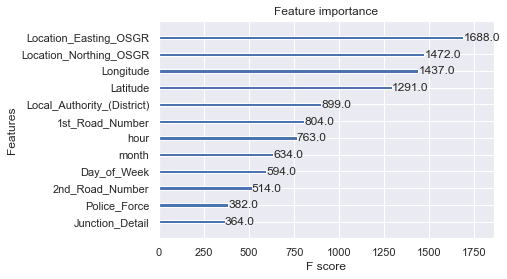

In [98]:
# plot
plt.figure(figsize=(19,25))
plot_importance(xgb_model, max_num_features=12) # top 10 most important features
plt.show()

In [99]:
# using weather conditions as the 'when' accidents will occur
df_pred_weather_con = df_accident.loc[:, (
        'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Junction_Detail', 
        'Light_Conditions','Speed_limit', 'Pedestrian_Crossing-Human_Control', 'Road_Type', )]
        
df_pred_weather_con.replace(-1, np.nan, inplace=True)
df_pred_weather_con.dropna(inplace=True) 
df_pred_weather_con = df_pred_weather_con.reset_index(drop=True)
df_pred_weather_con.head()

,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Junction_Detail,Light_Conditions,Speed_limit,Pedestrian_Crossing-Human_Control,Road_Type
0,1,Dry,Urban,1.0,1.0,30.0,0.0,1
1,1,Dry,Urban,3.0,4.0,30.0,0.0,6
2,1,Dry,Urban,3.0,4.0,20.0,0.0,6
3,1,Dry,Urban,6.0,4.0,30.0,0.0,6
4,1,Dry,Urban,0.0,4.0,30.0,0.0,3


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    df_pred_weather_con.drop(columns =['Weather_Conditions']), df_pred_weather_con['Weather_Conditions'],
    test_size=0.2, stratify=df_pred_weather_con['Weather_Conditions'], random_state=10
)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
categorical_columns=[ 'Road_Surface_Conditions', 'Pedestrian_Crossing-Human_Control', 
                     'Urban_or_Rural_Area', 'Junction_Detail''Light_Conditions', 'Road_Type', ]
                    
categorical = Pipeline([('OneHot', OneHotEncoder(sparse=True, handle_unknown='error'))])
engineering = ColumnTransformer(transformers=[('cat', categorical, categorical_columns)],remainder='passthrough')

### Compare with Government Model

In [102]:
# Fatal outcomes was removed since it's not included in the government model
df_pred_acc_sev_2 = df_accident.loc[:, (
            'Accident_Index',  'Pedestrian_Crossing-Human_Control', 'Speed_limit','Weather_Conditions',
            'Light_Conditions', 'Road_Surface_Conditions', 'Accident_Severity', 
            'Number_of_Vehicles', 'Number_of_Casualties', 'Urban_or_Rural_Area', 'Junction_Detail','Road_Type')]
        
df_pred_acc_sev_2 = df_pred_acc_sev_2[df_pred_acc_sev_2.loc[:,'Accident_Severity'] !=1]
df_pred_acc_sev_2.replace(-1, np.nan, inplace=True)
df_pred_acc_sev_2.dropna(inplace=True) 
df_pred_acc_sev_2 = df_pred_acc_sev_2.reset_index(drop=True)
df_pred_acc_sev_2.head(10)

,Accident_Index,Pedestrian_Crossing-Human_Control,Speed_limit,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Urban_or_Rural_Area,Junction_Detail,Road_Type
0,2019010128300,0.0,30.0,1,1.0,Dry,3,2,3,Urban,1.0,1
1,2019010155191,0.0,30.0,1,4.0,Dry,3,2,1,Urban,3.0,6
2,2019010155192,0.0,20.0,1,4.0,Dry,2,1,1,Urban,3.0,6
3,2019010155194,0.0,30.0,1,4.0,Dry,3,2,2,Urban,6.0,6
4,2019010155195,0.0,30.0,1,4.0,Dry,3,2,3,Urban,0.0,3
5,2019010155196,0.0,30.0,1,4.0,Dry,3,1,1,Urban,6.0,6
6,2019010155198,0.0,20.0,1,4.0,Dry,3,3,5,Urban,3.0,6
7,2019010155206,0.0,30.0,1,4.0,Dry,3,2,1,Urban,6.0,6
8,2019010155207,0.0,30.0,1,4.0,Dry,3,3,1,Urban,1.0,7
9,2019010155209,0.0,20.0,1,4.0,Dry,3,1,1,Urban,3.0,3
